# Lead Scoring Case Study 

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

# importing data manipulation and visualization libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor 
import statsmodels.api as sm 

#import re
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [2]:
X_ed = pd.read_csv("Leads.csv")

In [3]:
X_ed.head(7)

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   
5  2058ef08-2858-443e-a01f-a9237db2f5ce       660680                      API   
6  9fae7df4-169d-489b-afe4-0f3d752542ed       660673  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   
5      Olark Chat           No          No          0          0.0   
6          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   
5                            0                   0.0  Olark Chat Conversation   
6                         1640                   2.0             Email Opened   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   
5     NaN                      NaN                                NaN   
6   India  Supply Chain Management                      Online Search   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   
5                             NaN   
6                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   
5                                           NaN     No       No   
6                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   
5                No                 No        No                    No   
6                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                    

In [4]:
X_ed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
X_ed.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [6]:
X_ed.shape

(9240, 37)

In [7]:
# List of numerical columns present in the dataset
X_ed.describe().columns

Index(['Lead Number', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score'],
      dtype='object')

In [8]:
# Check for the percentage of null values that are present in the dataset
(X_ed.isnull().sum()/X_ed.shape[0])*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [9]:
# Encoding the variables with yes/no labels to no=0 and Yes=1
for cols in ['Do Not Email','X Education Forums','Newspaper'
            ,'Digital Advertisement','Through Recommendations', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article'
            ,'Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'
            ,'A free copy of Mastering The Interview']:

    X_ed[cols] = X_ed[cols].apply(lambda x : 1 if x=='Yes' else 0)
X_ed.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source  Do Not Email  Do Not Call  Converted  TotalVisits  \
0      Olark Chat             0            0          0          0.0   
1  Organic Search             0            0          0          5.0   
2  Direct Traffic             0            0          1          2.0   
3  Direct Traffic             0            0          0          1.0   
4          Google             0            0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course  Search  Magazine  \
0                       Better Career Prospects       0         0   
1                       Better Career Prospects       0         0   
2                       Better Career Prospects       0         0   
3                       Better Career Prospects       0         0   
4                       Better Career Prospects       0         0   

   Newspaper Article  X Education Forums  Newspaper  Digital Advertisement  \
0                  0                   0          0                      0   
1                  0                   0          0                      0   
2                  0                   0          0                      0   
3                  0                   0          0                      0   
4                  0                   0          0                      0   

   Through Recommendations  Receive More Updates About Our Courses  \
0                        0                                       0   
1                        0                                       0   
2                        0                                       0   
3                        0                                       0   
4                        0                                       0   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

   Update me on Supply Chain Content  Get updates on DM Content  \
0                                  0                          0   
1                                  0                          0   
2                                  0                          0   
3                        

In [10]:
X_ed.iloc[:,1:].select_dtypes(include='object').columns

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Country',
       'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'Lead Quality',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Last Notable Activity'],
      dtype='object')

In [11]:
for i in X_ed.iloc[:,1:].select_dtypes(include='object').columns:
  print('Feature Name = ', i)
  print('********')
  print(X_ed[i].value_counts(normalize=True)*100)
  print('*************************************************************************')

Feature Name =  Lead Origin
********
Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64
*************************************************************************
Feature Name =  Lead Source
********
Google               31.160365
Direct Traffic       27.629292
Olark Chat           19.067797
Organic Search       12.538027
Reference             5.801825
Welingak Website      1.542807
Referral Sites        1.358105
Facebook              0.597566
bing                  0.065189
google                0.054324
Click2call            0.043459
Press_Release         0.021730
Social Media          0.021730
Live Chat             0.021730
youtubechannel        0.010865
testone               0.010865
Pay per Click Ads     0.010865
welearnblog_Home      0.010865
WeLearn               0.010865
blog                  0.010865
NC_EDM       

In [12]:
# We need to convert all the 'select' to NaN as it does not represent anything so it is a null value
X_ed.replace('Select',np.nan, inplace=True)

In [13]:
(X_ed.isnull().sum()/X_ed.shape[0])*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [14]:
# Dropping the features with more than 70% of missing data/ NaN values
X_ed = X_ed.drop(X_ed.loc[:,list(round(X_ed.isnull().sum()/X_ed.shape[0]*100,2)>70)].columns,1)

In [15]:
X_ed['Lead Quality'].value_counts()

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

In [16]:
# We can impute the NaN values to 'Not Sure' as it represents the people who are not sure about buying the product
X_ed['Lead Quality'] = X_ed['Lead Quality'].replace(np.nan,'Not Sure')

In [17]:
X_ed.Country.value_counts(normalize=True)*100

India                   95.766337
United States            1.017849
United Arab Emirates     0.781826
Singapore                0.354035
Saudi Arabia             0.309780
United Kingdom           0.221272
Australia                0.191769
Qatar                    0.147514
Hong Kong                0.103260
Bahrain                  0.103260
Oman                     0.088509
France                   0.088509
unknown                  0.073757
South Africa             0.059006
Nigeria                  0.059006
Germany                  0.059006
Kuwait                   0.059006
Canada                   0.059006
Sweden                   0.044254
China                    0.029503
Asia/Pacific Region      0.029503
Uganda                   0.029503
Bangladesh               0.029503
Italy                    0.029503
Belgium                  0.029503
Netherlands              0.029503
Ghana                    0.029503
Philippines              0.029503
Russia                   0.014751
Switzerland   

In [18]:
# We can replace NaN values with 'India' as it is the most frequent in this feature
X_ed['Country'] = X_ed['Country'].replace(np.nan,'India')

In [19]:
round(X_ed.Tags.value_counts(normalize=True)*100,2)

Will revert after reading the email                  35.20
Ringing                                              20.43
Interested in other courses                           8.71
Already a student                                     7.90
Closed by Horizzon                                    6.08
switched off                                          4.08
Busy                                                  3.16
Lost to EINS                                          2.97
Not doing further education                           2.46
Interested  in full time MBA                          1.99
Graduation in progress                                1.89
invalid number                                        1.41
Diploma holder (Not Eligible)                         1.07
wrong number given                                    0.80
opp hangup                                            0.56
number not provided                                   0.46
in touch with EINS                                    0.

In [20]:
# replacing NaN values with 'Will revert after reading the email' as it is the mode of the feature 
X_ed['Tags'] = X_ed['Tags'].replace(np.nan,'Will revert after reading the email')

In [21]:
X_ed.City.value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [22]:
# Replacing the missing values with mode
X_ed['City'] = X_ed['City'].replace(np.nan,'Mumbai')

In [23]:
# imputing other NaN values that are present in the data
X_ed['Specialization'] = X_ed['Specialization'].replace(np.nan, 'Other_Specialization') # imputing the Other as it is safer option
X_ed['What is your current occupation'] = X_ed['What is your current occupation'].replace(np.nan, 'Unemployed') # imputing the mode that represents 95% of data
X_ed['What matters most to you in choosing a course'] = X_ed['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects') # imputing the mode


In [24]:
# Dropping the below columns as it has too much variations present in the data that makes it difficult to judge which values that can be imputed inplace of NaN values

X_ed = X_ed.drop(['Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Profile Score'],1)

In [25]:
round((X_ed.isnull().sum()/X_ed.shape[0])*100,2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

In [26]:
# Now we can drop the records containing rest of the NaN values 
X_ed.dropna(inplace=True)

In [27]:
# As we can see we do not have any NaN values in the dataset
round((X_ed.isnull().sum()/X_ed.shape[0])*100,2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

## EDA

(array([0, 1, 2, 3]),
 [Text(0, 0, 'API'),
  Text(1, 0, 'Landing Page Submission'),
  Text(2, 0, 'Lead Add Form'),
  Text(3, 0, 'Lead Import')])

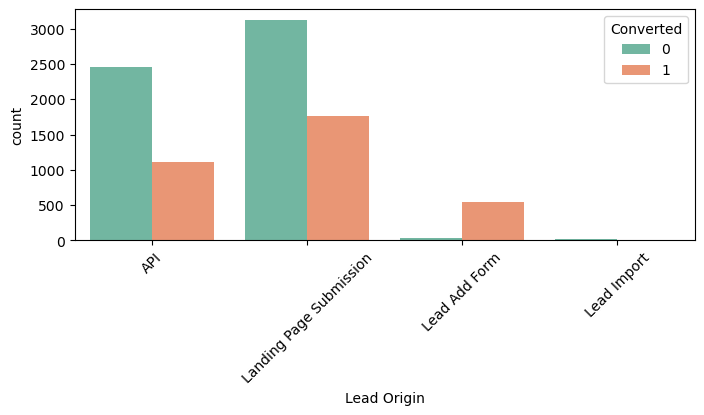

In [28]:
plt.figure(figsize=(8,3))
sns.countplot(x = "Lead Origin", hue = "Converted", data = X_ed,palette='Set2')
plt.xticks(rotation = 45)

**Analysis:**


*   The leads from API and Landing Page Submission are very high but the conversion is about ~30%.
*   Lead add Form has very high conversion rate.
*   Lead Import has very less leads associated with it.

**Inference:**
In order to improve our overall lead conversion rate, we should focus on improving the conversion rate of leads coming from API and Landing Page Submission sources, and also generate more leads through the Lead Add Form.



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'Olark Chat'),
  Text(1, 0, 'Organic Search'),
  Text(2, 0, 'Direct Traffic'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Referral Sites'),
  Text(5, 0, 'Reference'),
  Text(6, 0, 'google'),
  Text(7, 0, 'Welingak Website'),
  Text(8, 0, 'Facebook'),
  Text(9, 0, 'blog'),
  Text(10, 0, 'Pay per Click Ads'),
  Text(11, 0, 'bing'),
  Text(12, 0, 'Social Media'),
  Text(13, 0, 'WeLearn'),
  Text(14, 0, 'Click2call'),
  Text(15, 0, 'Live Chat'),
  Text(16, 0, 'welearnblog_Home'),
  Text(17, 0, 'youtubechannel'),
  Text(18, 0, 'testone'),
  Text(19, 0, 'Press_Release'),
  Text(20, 0, 'NC_EDM')])

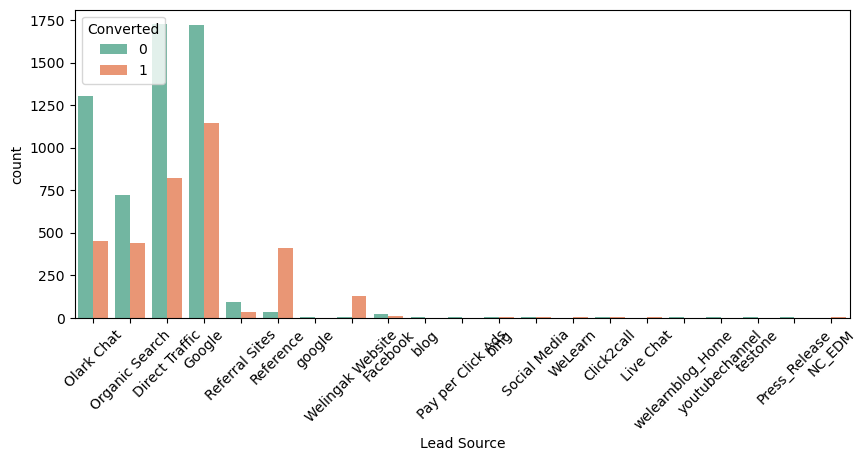

In [29]:
plt.figure(figsize=(10,4))
sns.countplot(x = "Lead Source", hue = "Converted", data = X_ed, palette='Set2')
plt.xticks(rotation = 45)

In [30]:
# Here we have google twice, we can replace google with 'Google'.
X_ed['Lead Source'] = X_ed['Lead Source'].replace(['google'], 'Google')

In [31]:
# Since we do not have much data regarding the below variables, we can put it in a single category that is 'others'
X_ed['Lead Source'] = X_ed['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release','Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Olark Chat'),
  Text(1, 0, 'Organic Search'),
  Text(2, 0, 'Direct Traffic'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Referral Sites'),
  Text(5, 0, 'Reference'),
  Text(6, 0, 'Welingak Website'),
  Text(7, 0, 'Facebook'),
  Text(8, 0, 'Others')])

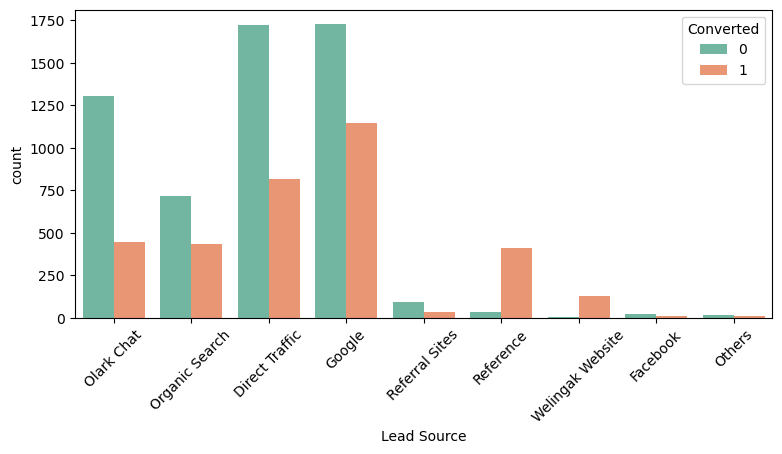

In [32]:
# Plotting the graph again
plt.figure(figsize=(9,4))
sns.countplot(x = "Lead Source", hue = "Converted", data = X_ed,palette='Set2')
plt.xticks(rotation = 45)

**Analysis:**
*   Google and Direct traffic are the main sources of leads.
*   Leads from reference sources and the welingak website have a high conversion rate

**Inference:**
In order to increase the overall lead conversion rate, we should work on improving the conversion rate of leads from olark chat, organic search, direct traffic, and google, and also generate more leads from reference sources and the welingak website



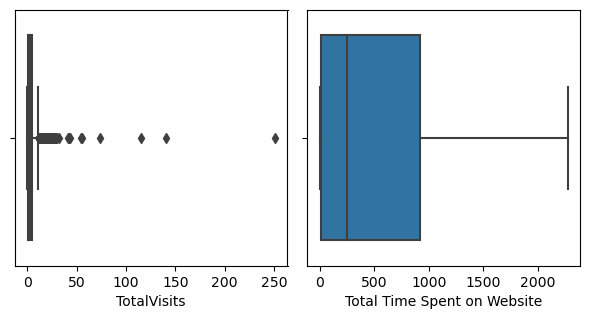

In [33]:
fig_1=plt.subplots(figsize=(6, 6))


for i, feat in enumerate(["TotalVisits", "Total Time Spent on Website"]):
    plt.subplot(2, 2, i+1)
    sns.boxplot(X_ed[feat])
    plt.tight_layout()

In [34]:
# Due to outliers exosting in the Total Visits data, we can take 97 percentile data
qua1 = X_ed["TotalVisits"].quantile(0.97)
X_ed["TotalVisits"][X_ed["TotalVisits"] >= qua1] = qua1

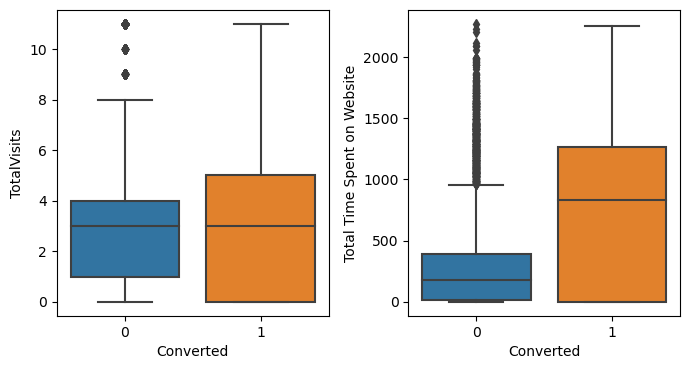

In [35]:
# Plotting it again
fig=plt.subplots(figsize=(7, 7))

for i, feat in enumerate(["TotalVisits", "Total Time Spent on Website"]):
    plt.subplot(2, 2, i+1)
    sns.boxplot(y = feat, x = 'Converted', data = X_ed)
    plt.tight_layout()

**Analysis:**
*   Since the median for both conversions and non-conversions is the same, nothing definitive can be inferred from this data.
*   More engaged visitors are more likely to convert on a website

**Inference:**
We can make more appealing websites in order to increase the time spent by Users on websites

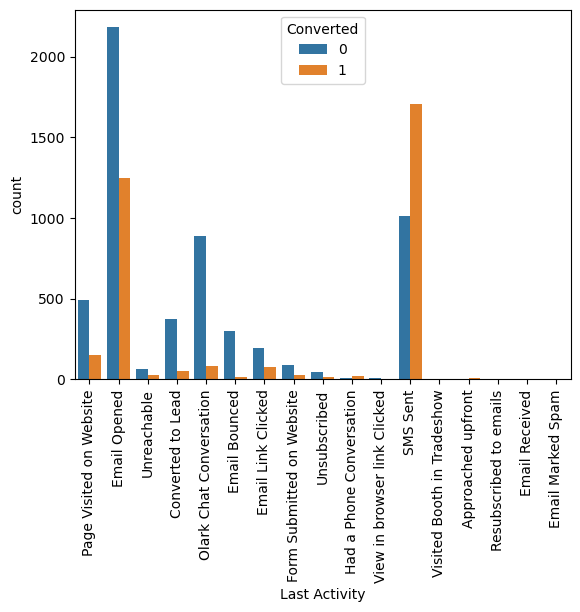

In [36]:
sns.countplot(x="Last Activity", hue="Converted", data= X_ed)
plt.xticks(rotation=90)
plt.show()

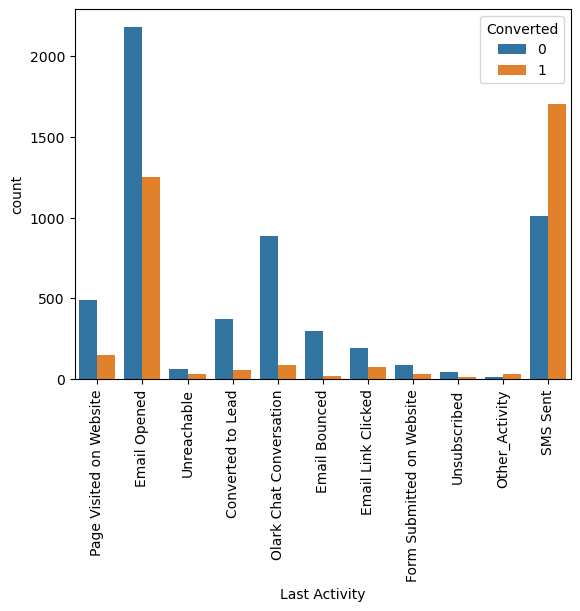

In [37]:
# The graph contains variables which does not represent more data, we can move those variables into single category called 'others'
X_ed['Last Activity'] = X_ed['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam','Visited Booth in Tradeshow', 'Approached upfront'], 'Other_Activity')

# Plotting the graph again
sns.countplot(x="Last Activity", hue="Converted", data= X_ed)
plt.xticks(rotation=90)
plt.show()

The most common last activity is "Email Opened"

The conversion rate is highest for SMS sent as the last activity.

**By calling those leads who had their last activity as an email opened, we should concentrate on boosting their conversion rate. We should also work to raise the number of leads who had their last activity as an SMS sent.**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Other_Specialization'),
  Text(1, 0, 'Business Administration'),
  Text(2, 0, 'Media and Advertising'),
  Text(3, 0, 'Supply Chain Management'),
  Text(4, 0, 'IT Projects Management'),
  Text(5, 0, 'Finance Management'),
  Text(6, 0, 'Travel and Tourism'),
  Text(7, 0, 'Human Resource Management'),
  Text(8, 0, 'Marketing Management'),
  Text(9, 0, 'Banking, Investment And Insurance'),
  Text(10, 0, 'International Business'),
  Text(11, 0, 'E-COMMERCE'),
  Text(12, 0, 'Operations Management'),
  Text(13, 0, 'Retail Management'),
  Text(14, 0, 'Services Excellence'),
  Text(15, 0, 'Hospitality Management'),
  Text(16, 0, 'Rural and Agribusiness'),
  Text(17, 0, 'Healthcare Management'),
  Text(18, 0, 'E-Business')])

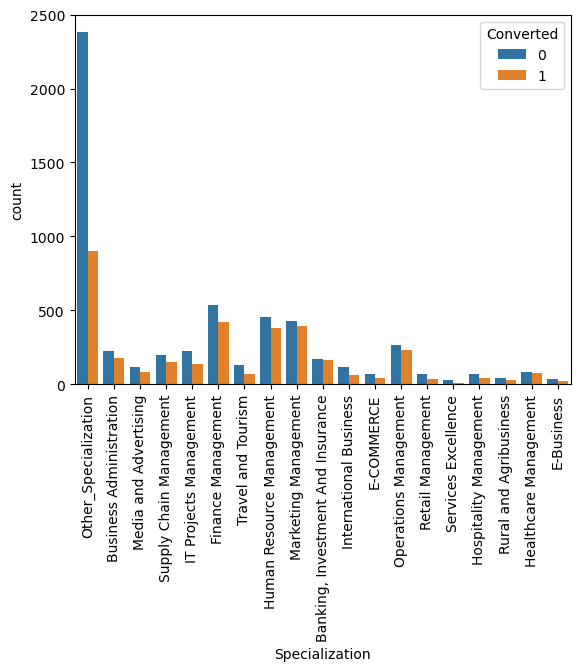

In [38]:
sns.countplot(x="Specialization", hue="Converted", data=X_ed)
plt.xticks( rotation='vertical')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Unemployed'),
  Text(1, 0, 'Student'),
  Text(2, 0, 'Working Professional'),
  Text(3, 0, 'Businessman'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Housewife')])

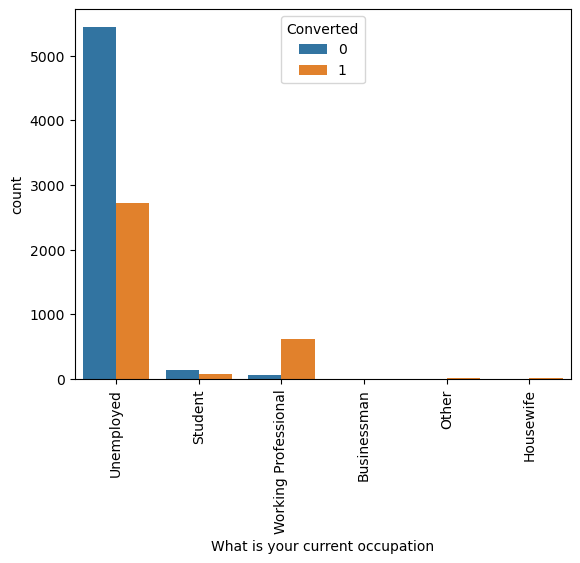

In [39]:
sns.countplot(x="What is your current occupation", hue="Converted", data=X_ed)
plt.xticks( rotation='vertical')

**Analysis:**
*   No specific conclusions regarding specialisation can be drawn from the plot shown above.
*   Working professionals have a high conversion rate, as seen in the above plot.
*   More leads come from the unemployed category than any other.

**Inference:**
To improve the overall conversion rate, we should aim to increase the number of Working Professional leads by using social sites like LinkedIn to reach out to them, and also work on improving the conversion rate of Unemployed leads

The Country, What matters most to you in choosing a course, and City columns have many values that correspond to one value, such as India for Country and Mumbai for City, so there are no specific insights that can be drawn from these columns


In [40]:
X_ed['What is your current occupation'] = X_ed['What is your current occupation'].replace("Other", 'Other_Occupation')
X_ed[["Search","Magazine","Newspaper Article","X Education Forums","Newspaper","Digital Advertisement",
         "Through Recommendations","Update me on Supply Chain Content","Get updates on DM Content"
         ,"I agree to pay the amount through cheque","A free copy of Mastering The Interview"]].describe()

Search  Magazine  Newspaper Article  X Education Forums  \
count  9074.000000    9074.0        9074.000000         9074.000000   
mean      0.001543       0.0           0.000220            0.000110   
std       0.039251       0.0           0.014845            0.010498   
min       0.000000       0.0           0.000000            0.000000   
25%       0.000000       0.0           0.000000            0.000000   
50%       0.000000       0.0           0.000000            0.000000   
75%       0.000000       0.0           0.000000            0.000000   
max       1.000000       0.0           1.000000            1.000000   

         Newspaper  Digital Advertisement  Through Recommendations  \
count  9074.000000            9074.000000              9074.000000   
mean      0.000110               0.000441                 0.000771   
std       0.010498               0.020992                 0.027766   
min       0.000000               0.000000                 0.000000   
25%       0.000000               0.000000                 0.000000   
50%       0.000000               0.000000                 0.000000   
75%       0.000000               0.000000                 0.000000   
max       1.000000               1.000000                 1.000000   

       Update me on Supply Chain Content  Get updates on DM Content  \
count                             9074.0                     9074.0   
mean                                 0.0                        0.0   
std                                  0.0                        0.0   
min                                  0.0                        0.0   
25%                                  0.0                        0.0   
50%                                  0.0                        0.0   
75%                                  0.0                        0.0   
max                                  0.0                        0.0   

       I agree to pay the amount through cheque  \
count                                    9074.0   
mean                                        0.0   
std                                         0.0   
min                                         0.0   
25%                                         0.0   
50%                                         0.0   
75%                                         0.0   
max                                         0.0   

       A free copy of Mastering The Interview  
count                             9074.000000  
mean                                 0.318272  
std                                  0.465831  
min                                  0.000000  
25%                                  0.000000  
50%                                  0.000000  
75%                                  1.000000  
max                                  1.000000

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Low in Relevance'),
  Text(1, 0, 'Not Sure'),
  Text(2, 0, 'Might be'),
  Text(3, 0, 'Worst'),
  Text(4, 0, 'High in Relevance')])

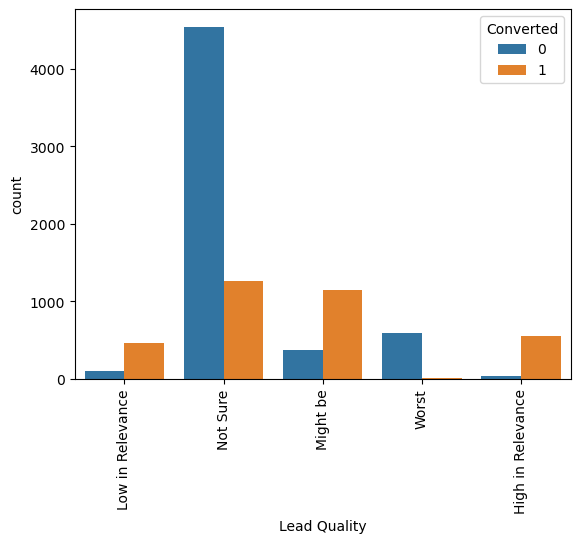

In [41]:
sns.countplot(x='Lead Quality', hue="Converted", data=X_ed)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'Interested in other courses'),
  Text(1, 0, 'Ringing'),
  Text(2, 0, 'Will revert after reading the email'),
  Text(3, 0, 'Lost to EINS'),
  Text(4, 0, 'In confusion whether part time or DLP'),
  Text(5, 0, 'Busy'),
  Text(6, 0, 'switched off'),
  Text(7, 0, 'in touch with EINS'),
  Text(8, 0, 'Already a student'),
  Text(9, 0, 'Diploma holder (Not Eligible)'),
  Text(10, 0, 'Graduation in progress'),
  Text(11, 0, 'number not provided'),
  Text(12, 0, 'opp hangup'),
  Text(13, 0, 'Closed by Horizzon'),
  Text(14, 0, 'Not doing further education'),
  Text(15, 0, 'invalid number'),
  Text(16, 0, 'wrong number given'),
  Text(17, 0, 'Interested  in full time MBA'),
  Text(18, 0, 'Still Thinking'),
  Text(19, 0, 'Lost to Others'),
  Text(20, 0, 'Shall take in the next coming month'),
  Text(21, 0, 'Lateral student'),
  Text(22, 0, 'Interested in Next batc

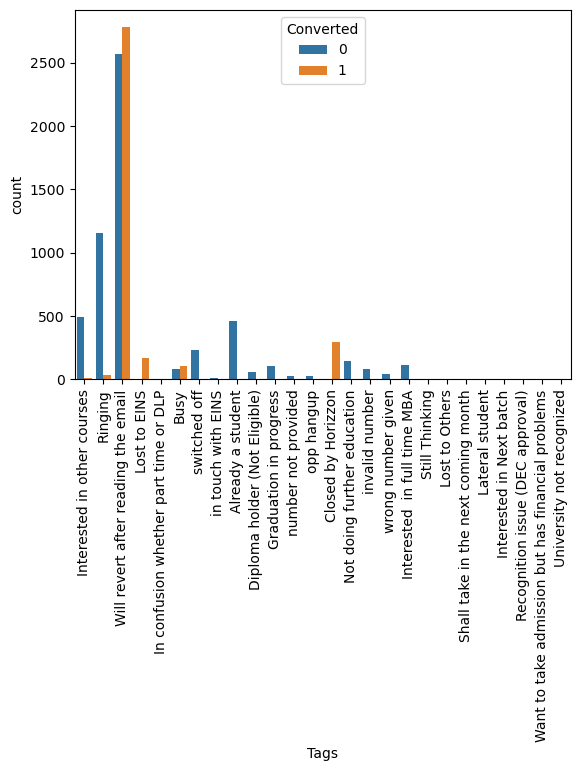

In [42]:
sns.countplot(x='Tags', hue="Converted", data=X_ed)
plt.xticks(rotation=90)

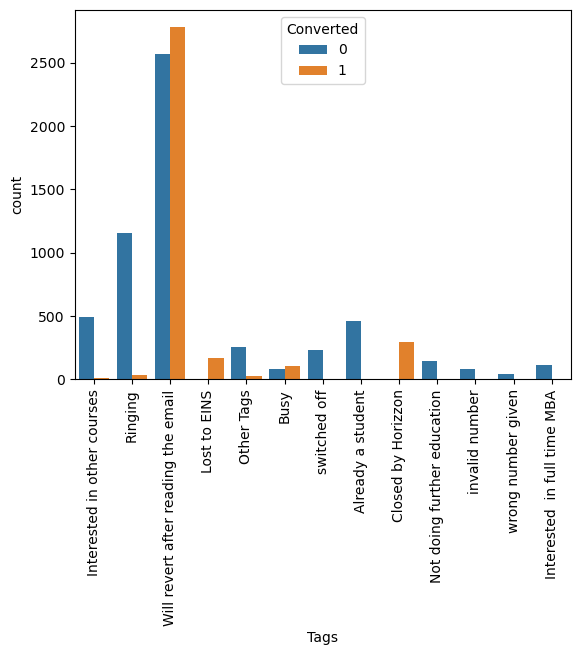

In [43]:
# Replacing unneccessory variables into other Tags
X_ed['Tags'] = X_ed['Tags'].replace(['Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                           'In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                           'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                           'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                           'University not recognized'], 'Other Tags')

# Plotting the graph again
sns.countplot(x="Tags", hue="Converted", data = X_ed)
plt.xticks(rotation=90)
plt.show()


**ANALYSIS:**
*   High conversion rates for "Will revert after reading the email" and "Closed by Horizzon"

**SUMMARY:**
*   In order to enhance the general lead conversion rate, we should concentrate on improving the conversion rate for leads from the 'API' and 'Landing Page Submission' sources, as well as increasing the number of leads generated from the 'Lead Add Form.
*   We need to concentrate on boosting the conversion rates of "Google," "Olark Chat," "Organic Search," and "Direct Traffic," as well as increasing the number of leads from "Reference" and "Welingak Website" in order to increase the overall lead conversion rate.
*   Websites can be improved to attract more users and lengthen their visits
*   We should focus on increasing the conversion rate of those having last activity as Email Opened by making a call to those leads and also try to increase the count of the ones having last activity as SMS sent
*   By connecting with them on various social networks, like LinkedIn and others, we can raise the number of working professional leads. We should also focus on improving the conversion rate of unemployed leads in order to increase overall conversion rate.s
*   We've noted that several columns only included data with a single value. These columns can be excluded from further analysis because they don't support any inferences.









In [44]:
# Now we can drop the unnecessary columns that are not required for the model building 

X_ed = X_ed.drop(['Lead Number','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Country','Do Not Call','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
           'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Country','Do Not Call','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content'],1)

X_ed.head()

Prospect ID              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852  Landing Page Submission   

      Lead Source  Do Not Email  Converted  TotalVisits  \
0      Olark Chat             0          0          0.0   
1  Organic Search             0          0          5.0   
2  Direct Traffic             0          1          2.0   
3  Direct Traffic             0          0          1.0   
4          Google             0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

            Specialization What is your current occupation  \
0     Other_Specialization                      Unemployed   
1     Other_Specialization                      Unemployed   
2  Business Administration                         Student   
3    Media and Advertising                      Unemployed   
4     Other_Specialization                      Unemployed   

                                  Tags      Lead Quality    City  \
0          Interested in other courses  Low in Relevance  Mumbai   
1                              Ringing          Not Sure  Mumbai   
2  Will revert after reading the email          Might be  Mumbai   
3                              Ringing          Not Sure  Mumbai   
4  Will revert after reading the email          Might be  Mumbai   

  Last Notable Activity  
0              Modified  
1          Email Opened  
2          Email Opened  
3              Modified  
4              Modified

In [45]:
dum_vars = pd.get_dummies(X_ed[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','Tags','Lead Quality','City','Last Notable Activity']], drop_first=True)
dum_vars.head()

Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Facebook  Lead Source_Google  \
0                        0                     0                   0   
1                        0                     0                   0   
2                        0                     0                   0   
3                        0                     0                   0   
4                        0                     0                   1   

   Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  \
0                       1                           0                   0   
1                       0                           1                   0   
2                       0                           0                   0   
3                       0                           0                   0   
4                       0                           0                   0   

   Lead Source_Reference  Lead Source_Referral Sites  \
0                      0                           0   
1                      0                           0   
2                      0                           0   
3                      0                           0   
4                      0                           0   

   Lead Source_Welingak Website  Last Activity_Email Bounced  \
0                             0                            0   
1                             0                            0   
2                             0                            0   
3                             0                            0   
4                             0                            0   

   Last Activity_Email Link Clicked  Last Activity_Email Opened  \
0                                 0                           0   
1                                 0                           1   
2                                 0                           1   
3                                 0                           0   
4                                 0                           0   

   Last Activity_Form Submitted on Website  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   Last Activity_Olark Chat Conversation  Last Activity_Other_Activity  \
0                                      0                             0   
1                                      0                             0   
2                                      0                             0   
3                                      0                             0   
4                                      0                             0   

   Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
0                                      1                       0   
1                                      0                       0   
2                                      0                       0   
3                                      0                       0   
4                                      0                       0   

   Last Activity_Unreachable  Last Activity_Unsubscribed  \
0                          0                           0   
1                          0                           0   
2                          0                           0   
3                          1                           0   
4                          0                           0   

   Specialization_Business Administration  Specialization_E-Business  \
0  

In [46]:
# After creating the dummy variables, now we can merge the dataframes 
X_ed = pd.concat([X_ed, dum_vars], axis=1)
X_ed.head()

Prospect ID              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852  Landing Page Submission   

      Lead Source  Do Not Email  Converted  TotalVisits  \
0      Olark Chat             0          0          0.0   
1  Organic Search             0          0          5.0   
2  Direct Traffic             0          1          2.0   
3  Direct Traffic             0          0          1.0   
4          Google             0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

            Specialization What is your current occupation  \
0     Other_Specialization                      Unemployed   
1     Other_Specialization                      Unemployed   
2  Business Administration                         Student   
3    Media and Advertising                      Unemployed   
4     Other_Specialization                      Unemployed   

                                  Tags      Lead Quality    City  \
0          Interested in other courses  Low in Relevance  Mumbai   
1                              Ringing          Not Sure  Mumbai   
2  Will revert after reading the email          Might be  Mumbai   
3                              Ringing          Not Sure  Mumbai   
4  Will revert after reading the email          Might be  Mumbai   

  Last Notable Activity  Lead Origin_Landing Page Submission  \
0              Modified                                    0   
1          Email Opened                                    0   
2          Email Opened                                    1   
3              Modified                                    1   
4              Modified                                    1   

   Lead Origin_Lead Add Form  Lead Origin_Lead Import  Lead Source_Facebook  \
0                          0                        0                     0   
1                          0                        0                     0   
2                          0                        0                     0   
3                          0                        0                     0   
4                          0                        0                     0   

   Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  \
0                   0                       1                           0   
1                   0                       0                           1   
2                   0                       0                           0   
3                   0                       0                           0   
4                   1                       0                           0   

   Lead Source_Others  Lead Source_Reference  Lead Source_Referral Sites  \
0                   0                      0                           0   
1                   0                      0                           0   
2                   0                      0                           0   
3                   0                      0                           0   
4                   0                      0                           0   

   Lead Source_Welingak Website  Last Activity_Email Bounced  \
0                             0                            0   
1                             0                            0   
2                      

In [47]:
# So now we have created the dummy variables, we can drop the features which are not required for the model building 
X_ed = X_ed.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','Tags','Lead Quality','City','Last Notable Activity'], axis=1)
X_ed.head()

Prospect ID  Do Not Email  Converted  TotalVisits  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620             0          0          0.0   
1  2a272436-5132-4136-86fa-dcc88c88f482             0          0          5.0   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a             0          1          2.0   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc             0          0          1.0   
4  3256f628-e534-4826-9d63-4a8b88782852             0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  \
0                            0                   0.0   
1                          674                   2.5   
2                         1532                   2.0   
3                          305                   1.0   
4                         1428                   1.0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Facebook  Lead Source_Google  \
0                        0                     0                   0   
1                        0                     0                   0   
2                        0                     0                   0   
3                        0                     0                   0   
4                        0                     0                   1   

   Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  \
0                       1                           0                   0   
1                       0                           1                   0   
2                       0                           0                   0   
3                       0                           0                   0   
4                       0                           0                   0   

   Lead Source_Reference  Lead Source_Referral Sites  \
0                      0                           0   
1                      0                           0   
2                      0                           0   
3                      0                           0   
4                      0                           0   

   Lead Source_Welingak Website  Last Activity_Email Bounced  \
0                             0                            0   
1                             0                            0   
2                             0                            0   
3                             0                            0   
4                             0                            0   

   Last Activity_Email Link Clicked  Last Activity_Email Opened  \
0                                 0                           0   
1                                 0                           1   
2                                 0                           1   
3                                 0                           0   
4                                 0                           0   

   Last Activity_Form Submitted on Website  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   Last Activity_Olark Chat Conversation  Last Activity_Other_Activity  \
0                                      0                             0   
1                                      0                             0   
2                                      0                             0   
3                                      0                             0   
4                                      0                             0   

   Last Activity_Page Visited on Website  Last

Dropping the traget variable to train the dataset and assigning it to Y

### Train test split
The next step is to split the dataset into training an testing sets

In [48]:
# Put all the feature variables in X

# X = all cols except Converted col

In [49]:
X = X_ed.drop(['Converted','Prospect ID'], axis=1)
y = X_ed['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [50]:
X.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
0             0          0.0                            0   
1             0          5.0                          674   
2             0          2.0                         1532   
3             0          1.0                          305   
4             0          2.0                         1428   

   Page Views Per Visit  Lead Origin_Landing Page Submission  \
0                   0.0                                    0   
1                   2.5                                    0   
2                   2.0                                    1   
3                   1.0                                    1   
4                   1.0                                    1   

   Lead Origin_Lead Add Form  Lead Origin_Lead Import  Lead Source_Facebook  \
0                          0                        0                     0   
1                          0                        0                     0   
2                          0                        0                     0   
3                          0                        0                     0   
4                          0                        0                     0   

   Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  \
0                   0                       1                           0   
1                   0                       0                           1   
2                   0                       0                           0   
3                   0                       0                           0   
4                   1                       0                           0   

   Lead Source_Others  Lead Source_Reference  Lead Source_Referral Sites  \
0                   0                      0                           0   
1                   0                      0                           0   
2                   0                      0                           0   
3                   0                      0                           0   
4                   0                      0                           0   

   Lead Source_Welingak Website  Last Activity_Email Bounced  \
0                             0                            0   
1                             0                            0   
2                             0                            0   
3                             0                            0   
4                             0                            0   

   Last Activity_Email Link Clicked  Last Activity_Email Opened  \
0                                 0                           0   
1                                 0                           1   
2                                 0                           1   
3                                 0                           0   
4                                 0                           0   

   Last Activity_Form Submitted on Website  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   Last Activity_Olark Chat Conversation  Last Activity_Other_Activity  \
0                                      0                             0   
1                                      0                             0   
2                                      0                             0   
3                                      0                             0   
4                                      0                             0   

   Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
0                                      1                       0   
1                                      0                       0   
2                                      0                       0   
3                                      0                       0   
4     

In [51]:
# Performing train test split operation - 70% training data and 30% test data.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Feature Scaling
Using StandardScaler to perform scaling due to some numeric variable have different scales, 

In [52]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [53]:
X_train.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
3009             0     0.181818                     0.178347   
1012             1     0.181818                     0.085355   
9226             0     0.000000                     0.000000   
4750             0     0.181818                     0.619946   
7987             0     0.454545                     0.711590   

      Page Views Per Visit  Lead Origin_Landing Page Submission  \
3009              0.083333                                    1   
1012              0.083333                                    1   
9226              0.000000                                    0   
4750              0.083333                                    1   
7987              0.104167                                    1   

      Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
3009                          0                        0   
1012                          0                        0   
9226                          0                        0   
4750                          0                        0   
7987                          0                        0   

      Lead Source_Facebook  Lead Source_Google  Lead Source_Olark Chat  \
3009                     0                   0                       0   
1012                     0                   0                       0   
9226                     0                   0                       1   
4750                     0                   0                       0   
7987                     0                   0                       0   

      Lead Source_Organic Search  Lead Source_Others  Lead Source_Reference  \
3009                           0                   0                      0   
1012                           0                   0                      0   
9226                           0                   0                      0   
4750                           0                   0                      0   
7987                           0                   0                      0   

      Lead Source_Referral Sites  Lead Source_Welingak Website  \
3009                           0                             0   
1012                           0                             0   
9226                           0                             0   
4750                           0                             0   
7987                           0                             0   

      Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
3009                            0                                 0   
1012                            1                                 0   
9226                            0                                 0   
4750                            0                                 0   
7987                            0                                 0   

      Last Activity_Email Opened  Last Activity_Form Submitted on Website  \
3009                           1                                        0   
1012                           0                                        0   
9226                           0                                        0   
4750                           0                                        0   
7987                           0                                        0   

      Last Activity_Olark Chat Conversation  Last Activity_Other_Activity  \
3009                                      0                             0   
1012                                      0                             0   
9226                                      0                             0   
4750                                      0                             0   
7987                                      0                             0   

      Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
3009                                      0                       0   
1012                                      0  

In [54]:
### Checking the conversion Rate
converted = (sum(X_ed['Converted'])/len(X_ed['Converted'].index))*100
converted

37.85541106458012

We have 38% conversion rate.

Looking at the correlations
Let's now look at the correlations. Since the number of variables are pretty high, it's better that we look at the table instead of plotting a heatmap

In [55]:
# Looking at correlation 
X_ed.corr()

Do Not Email  Converted  \
Do Not Email                                            1.000000  -0.140786   
Converted                                              -0.140786   1.000000   
TotalVisits                                             0.002947   0.051452   
Total Time Spent on Website                            -0.046192   0.359261   
Page Views Per Visit                                    0.036403   0.000260   
Lead Origin_Landing Page Submission                     0.099661  -0.037481   
Lead Origin_Lead Add Form                              -0.031468   0.300775   
Lead Origin_Lead Import                                -0.016857  -0.009328   
Lead Source_Facebook                                   -0.017137  -0.010651   
Lead Source_Google                                     -0.070919   0.029022   
Lead Source_Olark Chat                                 -0.051070  -0.124085   
Lead Source_Organic Search                              0.035510  -0.000581   
Lead Source_Others                                      0.009635   0.001325   
Lead Source_Reference                                  -0.035958   0.255480   
Lead Source_Referral Sites                             -0.010042  -0.031812   
Lead Source_Welingak Website                            0.002835   0.150027   
Last Activity_Email Bounced                             0.620041  -0.127327   
Last Activity_Email Link Clicked                       -0.043705  -0.037746   
Last Activity_Email Opened                             -0.220691  -0.023051   
Last Activity_Form Submitted on Website                -0.018751  -0.032183   
Last Activity_Olark Chat Conversation                  -0.055115  -0.208619   
Last Activity_Other_Activity                           -0.001892   0.050549   
Last Activity_Page Visited on Website                   0.083819  -0.080999   
Last Activity_SMS Sent                                 -0.019915   0.335815   
Last Activity_Unreachable                               0.007831  -0.011625   
Last Activity_Unsubscribed                              0.261142  -0.023562   
Specialization_Business Administration                  0.005017   0.026549   
Specialization_E-Business                               0.012947  -0.001661   
Specialization_E-COMMERCE                               0.030648  -0.006241   
Specialization_Finance Management                      -0.004882   0.043580   
Specialization_Healthcare Management                    0.011606   0.029621   
Specialization_Hospitality Management                   0.012054   0.006161   
Specialization_Human Resource Management               -0.018428   0.049586   
Specialization_IT Projects Management                   0.070893   0.001674   
Specialization_International Business                   0.003297  -0.007621   
Specialization_Marketing Management                    -0.025537   0.067607   
Specialization_Media and Advertising                    0.000169   0.011600   
Specialization_Operations Management                   -0.013224   0.044953   
Specialization_Other_Specialization                    -0.041663  -0.161448   
Specialization_Retail Management                        0.023922  -0.008391   
Specialization_Rural and Agribusiness                   0.028553   0.008560   
Specialization_Services Excellence                      0.054570  -0.014207   
Specialization_Supply Chain Management                  0.003625   0.020193   
Specialization_Travel and Tourism                       0.061126  -0.008421   
What is your current occupation_Housewife              -0.009222   0.040372   
What is your current occupation_Other_Occupation       -0.001847   0.018578   
What is your current occupation_Student                 0.007534  -0.006074   
What is your current occupation_Unemployed              0.039641  -0.281174   
What is your current occupation_Working Profess...     -0.047325   0.316246   
Tags_Busy                                              -0.016192   0.056219   
Tags_Closed by Horizzon

### Model Building
Let's now move to model building. As you can see that there are a lot of variables present in the dataset which we cannot deal with. So the best way to approach this is to select a small set of features from this pool of variables using RFE.

In [56]:
# Import 'LogisticRegression' and create a LogisticRegression object
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [57]:
# Import RFE and select 15 variables
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select= 15, step=1)             # running RFE with 15 variables as output RFE(estimator, n_features_to_select=5, step=1)
rfe = rfe.fit(X_train, y_train)

In [58]:
rfe.support_

array([ True, False,  True, False, False,  True, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True, False, False,  True, False,
       False,  True,  True,  True,  True,  True, False, False,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False])

In [59]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 31),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 19),
 ('Lead Origin_Landing Page Submission', False, 15),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 21),
 ('Lead Source_Facebook', False, 44),
 ('Lead Source_Google', False, 52),
 ('Lead Source_Olark Chat', False, 6),
 ('Lead Source_Organic Search', False, 54),
 ('Lead Source_Others', False, 48),
 ('Lead Source_Reference', False, 59),
 ('Lead Source_Referral Sites', False, 35),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 28),
 ('Last Activity_Email Link Clicked', False, 38),
 ('Last Activity_Email Opened', False, 70),
 ('Last Activity_Form Submitted on Website', False, 67),
 ('Last Activity_Olark Chat Conversation', False, 12),
 ('Last Activity_Other_Activity', False, 8),
 ('Last Activity_Page Visited on Website', False, 39),
 ('Last Activity_SMS Sent', False, 5),
 ('Last Activity_

In [60]:
# Select only the columns selected by RFE
col = X_train.columns[rfe.support_]

In [61]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other_Activity',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Sp

Assessing the model with StatsModels

In [62]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1407.3
Date:                Mon, 02 Jan 2023   Deviance:                       2814.5
Time:                        19:36:43   Pearson chi2:                 2.35e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.5893
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.6713      0.229    -11.677      0.000      -3.120      -2.223
Do Not Email                                -1.4592      0.230     -6.338      0.000      -1.911      -1.008
Total Time Spent on Website                  3.7812      0.206     18.364      0.000       3.378       4.185
Lead Origin_Lead Add Form                    2.1246      0.363      5.859      0.000       1.414       2.835
Lead Source_Welingak Website                 3.1441      0.820      3.834      0.000       1.537       4.751
Tags_Busy                                    3.1128      0.335      9.289      0.000       2.456       3.770
Tags_Closed by Horizzon                      7.5675      0.775      9.762      0.000       6.048       9.087
Tags_Lost to EINS                            8.6659      0.759     11.413      0.000       7.178      10.154
Tags_Ringing                                -2.0262      0.349     -5.805      0.000      -2.710      -1.342
Tags_Will revert after reading the email     3.6613      0.234     15.647      0.000       3.203       4.120
Tags_invalid number                        -23.7399   2.22e+04     -0.001      0.999   -4.35e+04    4.35e+04
Tags_switched off                           -2.7641      0.608     -4.544      0.000      -3.956      -1.572
Tags_wrong number given                    -23.2199   3.09e+04     -0.001      0.999   -6.06e+04    6.06e+04
Lead Quality_Not Sure                       -3.2343      0.131    -24.754      0.000      -3.490      -2.978
Lead Quality_Worst                          -3.9342      0.887     -4.433      0.000      -5.674      -2.195
Last Notable Activity_SMS Sent               2.6860      0.130     20.709      0.000       2.432       2.940
============================================================================================================
"""

We can see some variable having p value grater han 0.05, Tags_invalid number and Tags_wrong given number

In [63]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.172216
1012    0.032899
9226    0.000359
4750    0.941899
7987    0.995726
1281    0.995262
2880    0.096428
4971    0.922618
7536    0.987256
1248    0.004546
dtype: float64

Let's Check for VIF's

In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [65]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
8   Tags_Will revert after reading the email  3.27
12                     Lead Quality_Not Sure  2.71
1                Total Time Spent on Website  1.90
2                  Lead Origin_Lead Add Form  1.67
7                               Tags_Ringing  1.62
14            Last Notable Activity_SMS Sent  1.58
3               Lead Source_Welingak Website  1.34
5                    Tags_Closed by Horizzon  1.21
4                                  Tags_Busy  1.14
0                               Do Not Email  1.11
10                         Tags_switched off  1.11
6                          Tags_Lost to EINS  1.09
13                        Lead Quality_Worst  1.06
9                        Tags_invalid number  1.04
11                   Tags_wrong number given  1.02

So, we have all variable with VIF < 5, so now we will remove those variable whose P-value is grater than 0.05.

In [66]:
X_train[col].columns

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Tags_Busy', 'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_invalid number', 'Tags_switched off', 'Tags_wrong number given',
       'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [67]:
X_train[col].drop('Tags_invalid number', axis = 1, inplace = True)

In [68]:
X_train[col].columns

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Tags_Busy', 'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_invalid number', 'Tags_switched off', 'Tags_wrong number given',
       'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [69]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1407.3
Date:                Mon, 02 Jan 2023   Deviance:                       2814.5
Time:                        19:36:43   Pearson chi2:                 2.35e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.5893
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.6713      0.229    -11.677      0.000      -3.120      -2.223
Do Not Email                                -1.4592      0.230     -6.338      0.000      -1.911      -1.008
Total Time Spent on Website                  3.7812      0.206     18.364      0.000       3.378       4.185
Lead Origin_Lead Add Form                    2.1246      0.363      5.859      0.000       1.414       2.835
Lead Source_Welingak Website                 3.1441      0.820      3.834      0.000       1.537       4.751
Tags_Busy                                    3.1128      0.335      9.289      0.000       2.456       3.770
Tags_Closed by Horizzon                      7.5675      0.775      9.762      0.000       6.048       9.087
Tags_Lost to EINS                            8.6659      0.759     11.413      0.000       7.178      10.154
Tags_Ringing                                -2.0262      0.349     -5.805      0.000      -2.710      -1.342
Tags_Will revert after reading the email     3.6613      0.234     15.647      0.000       3.203       4.120
Tags_invalid number                        -23.7399   2.22e+04     -0.001      0.999   -4.35e+04    4.35e+04
Tags_switched off                           -2.7641      0.608     -4.544      0.000      -3.956      -1.572
Tags_wrong number given                    -23.2199   3.09e+04     -0.001      0.999   -6.06e+04    6.06e+04
Lead Quality_Not Sure                       -3.2343      0.131    -24.754      0.000      -3.490      -2.978
Lead Quality_Worst                          -3.9342      0.887     -4.433      0.000      -5.674      -2.195
Last Notable Activity_SMS Sent               2.6860      0.130     20.709      0.000       2.432       2.940
============================================================================================================
"""

In [70]:
X_train[col] = X_train[col].drop('Tags_wrong number given', axis = 1, inplace = True)

In [71]:
X_train_sm.columns

Index(['const', 'Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Tags_Busy', 'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_invalid number', 'Tags_switched off', 'Tags_wrong number given',
       'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [72]:
X_train_sm.drop('Tags_wrong number given', axis = 1, inplace = True)

In [73]:
X_train_sm.columns

Index(['const', 'Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Tags_Busy', 'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_invalid number', 'Tags_switched off', 'Lead Quality_Not Sure',
       'Lead Quality_Worst', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [74]:
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1410.3
Date:                Mon, 02 Jan 2023   Deviance:                       2820.6
Time:                        19:36:44   Pearson chi2:                 2.35e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5889
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.7707      0.229    -12.099      0.000      -3.220      -2.322
Do Not Email                                -1.4537      0.230     -6.325      0.000      -1.904      -1.003
Total Time Spent on Website                  3.7700      0.205     18.351      0.000       3.367       4.173
Lead Origin_Lead Add Form                    2.1418      0.364      5.878      0.000       1.428       2.856
Lead Source_Welingak Website                 3.1224      0.821      3.805      0.000       1.514       4.731
Tags_Busy                                    3.2259      0.334      9.671      0.000       2.572       3.880
Tags_Closed by Horizzon                      7.6656      0.775      9.887      0.000       6.146       9.185
Tags_Lost to EINS                            8.7638      0.759     11.542      0.000       7.276      10.252
Tags_Ringing                                -1.9093      0.347     -5.502      0.000      -2.589      -1.229
Tags_Will revert after reading the email     3.7666      0.233     16.142      0.000       3.309       4.224
Tags_invalid number                        -22.6209   1.35e+04     -0.002      0.999   -2.64e+04    2.64e+04
Tags_switched off                           -2.6451      0.607     -4.358      0.000      -3.835      -1.455
Lead Quality_Not Sure                       -3.2354      0.131    -24.773      0.000      -3.491      -2.979
Lead Quality_Worst                          -3.8706      0.894     -4.331      0.000      -5.622      -2.119
Last Notable Activity_SMS Sent               2.6690      0.129     20.722      0.000       2.417       2.921
============================================================================================================
"""

In [75]:
X_train_sm.drop('Tags_invalid number', axis = 1, inplace = True)

In [76]:
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1415.6
Date:                Mon, 02 Jan 2023   Deviance:                       2831.1
Time:                        19:36:44   Pearson chi2:                 2.32e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5882
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.9109      0.230    -12.635      0.000      -3.362      -2.459
Do Not Email                                -1.4441      0.229     -6.298      0.000      -1.893      -0.995
Total Time Spent on Website                  3.7735      0.205     18.396      0.000       3.371       4.176
Lead Origin_Lead Add Form                    2.1743      0.366      5.936      0.000       1.456       2.892
Lead Source_Welingak Website                 3.0845      0.821      3.756      0.000       1.475       4.694
Tags_Busy                                    3.3758      0.333     10.131      0.000       2.723       4.029
Tags_Closed by Horizzon                      7.7919      0.776     10.042      0.000       6.271       9.313
Tags_Lost to EINS                            8.8904      0.760     11.700      0.000       7.401      10.380
Tags_Ringing                                -1.7431      0.345     -5.045      0.000      -2.420      -1.066
Tags_Will revert after reading the email     3.9029      0.235     16.624      0.000       3.443       4.363
Tags_switched off                           -2.4725      0.606     -4.081      0.000      -3.660      -1.285
Lead Quality_Not Sure                       -3.2249      0.130    -24.743      0.000      -3.480      -2.969
Lead Quality_Worst                          -3.8270      0.898     -4.264      0.000      -5.586      -2.068
Last Notable Activity_SMS Sent               2.6319      0.127     20.664      0.000       2.382       2.882
============================================================================================================
"""

In [77]:
#re-check VIF
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                                      const  13.69
9   Tags_Will revert after reading the email   2.48
8                               Tags_Ringing   1.84
12                        Lead Quality_Worst   1.66
3                  Lead Origin_Lead Add Form   1.63
11                     Lead Quality_Not Sure   1.48
6                    Tags_Closed by Horizzon   1.40
4               Lead Source_Welingak Website   1.34
13            Last Notable Activity_SMS Sent   1.20
2                Total Time Spent on Website   1.19
10                         Tags_switched off   1.19
5                                  Tags_Busy   1.17
7                          Tags_Lost to EINS   1.13
1                               Do Not Email   1.02

## Model Evaluation
Now, both the p-values and VIFs seem decent enough for all the variables. So let's go ahead and make predictions using this final set of features

In [78]:
X_train[col].columns

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Tags_Busy', 'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_invalid number', 'Tags_switched off', 'Tags_wrong number given',
       'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [79]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 
                                   'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

Converted  Conversion_Prob
3009          0         0.172216
1012          0         0.032899
9226          0         0.000359
4750          1         0.941899
7987          1         0.995726

Creating new column 'Predicted' with 1 if Paid_Prob > 0.5 else 0

In [80]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

Converted  Conversion_Prob  predicted
3009          0         0.172216          0
1012          0         0.032899          0
9226          0         0.000359          0
4750          1         0.941899          1
7987          1         0.995726          1

##### So, we have mapped probabilities now lets evaluate our model

In [81]:
# Import metrics from sklearn for evaluation

from sklearn import metrics

In [82]:
# Create confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3702,  203],
       [ 299, 2147]], dtype=int64)

In [83]:
# Predicted     not_converted    converted
# Actual
# not_converted        3702      203
# converted            299       2147 

In [84]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9209573295544009


In [85]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [86]:
# Calculate the sensitivity

TP/(TP+FN)

0.8777596075224857

In [87]:
# Calculate the specificity

TN/(TN+FP)

0.9480153649167734

## Finding the Optimal Cutoff
Now 0.5 was just arbitrary to loosely check the model performace. But in order to get good results, you need to optimise the threshold. So first let's plot an ROC curve to see what AUC we get.

In [88]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [89]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, 
                                         y_train_pred_final.Conversion_Prob, drop_intermediate = False )

In [90]:
# Import matplotlib to plot the ROC curve

import matplotlib.pyplot as plt

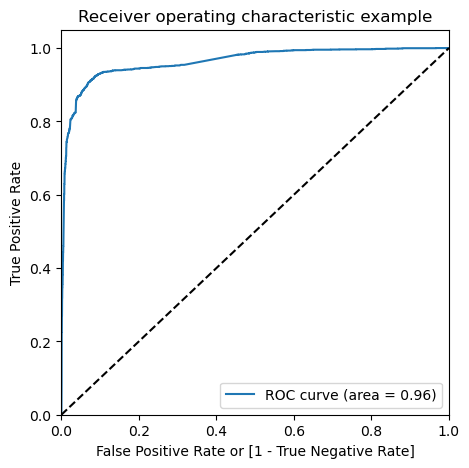

In [91]:
# Call the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

The area under the curve of the ROC is 0.96 which is very good. So we seem to have a good model. Let's also check the sensitivity and specificity tradeoff to find the optimal cutoff point.

In [92]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
3009          0         0.172216          0    1    1    0    0    0    0   
1012          0         0.032899          0    1    0    0    0    0    0   
9226          0         0.000359          0    1    0    0    0    0    0   
4750          1         0.941899          1    1    1    1    1    1    1   
7987          1         0.995726          1    1    1    1    1    1    1   

      0.6  0.7  0.8  0.9  
3009    0    0    0    0  
1012    0    0    0    0  
9226    0    0    0    0  
4750    1    1    1    1  
7987    1    1    1    1

In [93]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at 
# different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.797197  0.952576  0.699872
0.2   0.2  0.906944  0.934996  0.889373
0.3   0.3  0.917021  0.919460  0.915493
0.4   0.4  0.920642  0.905151  0.930346
0.5   0.5  0.920957  0.877760  0.948015
0.6   0.6  0.921430  0.856909  0.961844
0.7   0.7  0.909778  0.806623  0.974392
0.8   0.8  0.894977  0.750204  0.985659
0.9   0.9  0.868997  0.676206  0.989757


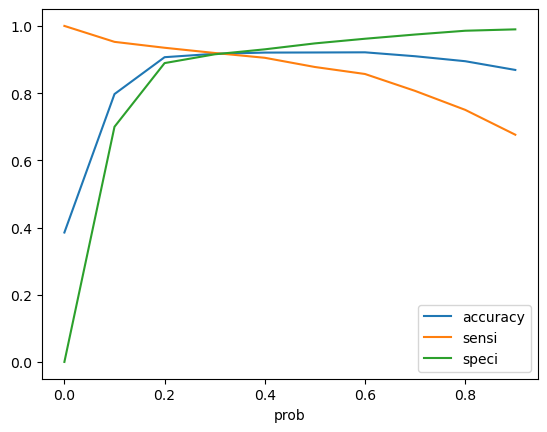

In [94]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

As you can see that around 0.40 you get the optimal values of the three metrics. So let's choose 0.42 as our cutoff now.

In [95]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.40 else 0)

y_train_pred_final.head()

Converted  Conversion_Prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
3009          0         0.172216          0    1    1    0    0    0    0   
1012          0         0.032899          0    1    0    0    0    0    0   
9226          0         0.000359          0    1    0    0    0    0    0   
4750          1         0.941899          1    1    1    1    1    1    1   
7987          1         0.995726          1    1    1    1    1    1    1   

      0.6  0.7  0.8  0.9  final_predicted  
3009    0    0    0    0                0  
1012    0    0    0    0                0  
9226    0    0    0    0                0  
4750    1    1    1    1                1  
7987    1    1    1    1                1

In [96]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.920642418516769

In [97]:
# Creating Confusion matric again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3633,  272],
       [ 232, 2214]], dtype=int64)

In [98]:

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [99]:
TP/(TP+FN) # Calculate Sensitivity

0.9051512673753066

In [100]:
# Calculate Specificity

TN/(TN+FP)

0.9303457106274008

This cutoff point seems good to go!

## Making Predictions on the Test Set

In [101]:
# Scale the test set as well using just 'transform'

X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [102]:
# Select the columns in X_train for X_test as well

X_test = X_test[col]
X_test.head()

Do Not Email  Total Time Spent on Website  Lead Origin_Lead Add Form  \
3271             0                     0.070530                          0   
1490             0                     0.679695                          0   
7936             0                     0.033243                          0   
4216             0                     0.000000                          1   
3830             0                     0.073675                          0   

      Lead Source_Welingak Website  Tags_Busy  Tags_Closed by Horizzon  \
3271                             0          0                        0   
1490                             0          0                        0   
7936                             0          0                        0   
4216                             0          0                        1   
3830                             0          0                        0   

      Tags_Lost to EINS  Tags_Ringing  \
3271                  0             0   
1490                  0             0   
7936                  0             0   
4216                  0             0   
3830                  0             0   

      Tags_Will revert after reading the email  Tags_invalid number  \
3271                                         1                    0   
1490                                         1                    0   
7936                                         1                    0   
4216                                         0                    0   
3830                                         1                    0   

      Tags_switched off  Tags_wrong number given  Lead Quality_Not Sure  \
3271                  0                        0                      1   
1490                  0                        0                      0   
7936                  0                        0                      1   
4216                  0                        0                      0   
3830                  0                        0                      1   

      Lead Quality_Worst  Last Notable Activity_SMS Sent  
3271                   0                               0  
1490                   0                               0  
7936                   0                               0  
4216                   0                               0  
3830                   0                               0

In [103]:
# Add a constant to X_test

X_test_sm = sm.add_constant(X_test[col])

In [104]:
X_test_sm

const  Do Not Email  Total Time Spent on Website  \
3271    1.0             0                     0.070530   
1490    1.0             0                     0.679695   
7936    1.0             0                     0.033243   
4216    1.0             0                     0.000000   
3830    1.0             0                     0.073675   
1800    1.0             0                     0.034142   
6507    1.0             0                     0.057951   
4821    1.0             0                     0.306379   
4223    1.0             0                     0.000000   
4714    1.0             0                     0.000000   
3977    1.0             0                     0.108266   
4209    1.0             0                     0.000000   
2320    1.0             0                     0.101078   
3744    1.0             0                     0.000000   
2570    1.0             0                     0.000000   
985     1.0             0                     0.601078   
1946    1.0             0                     0.254717   
7813    1.0             0                     0.116801   
7031    1.0             0                     0.000000   
2044    1.0             0                     0.166667   
7906    1.0             0                     0.107367   
2461    1.0             0                     0.000000   
8154    1.0             0                     0.181491   
5822    1.0             0                     0.000000   
4513    1.0             0                     0.000000   
2684    1.0             0                     0.000000   
5999    1.0             0                     0.144654   
4809    1.0             0                     0.438455   
4959    1.0             0                     0.178347   
8449    1.0             0                     0.471698   
2010    1.0             0                     0.389039   
1405    1.0             0                     0.190027   
2591    1.0             0                     0.110961   
4062    1.0             0                     0.209793   
5342    1.0             0                     0.033243   
7696    1.0             0                     0.783917   
9049    1.0             0                     0.552561   
92      1.0             0                     0.045373   
3756    1.0             0                     0.124438   
9005    1.0             0                     0.046271   
8465    1.0             0                     0.420485   
7298    1.0             1                     0.253369   
6600    1.0             0                     0.088500   
6676    1.0             0                     0.560198   
6367    1.0             1                     0.091644   
3848    1.0             0                     0.021114   
1518    1.0             0                     0.309075   
7388    1.0             0                     0.086253   
3765    1.0             0                     0.058850   
4423    1.0             0                     0.057502   
1106    1.0             0                     0.264151   
512     1.0             0                     0.669811   
4543    1.0             0                     0.192722   
678     1.0             0                     0.094789   
4830    1.0             0                     0.000000   
1158    1.0             0                     0.306379   
6508    1.0             0                     0.033243   
4365    1.0             0                     0.000000   
8039    1.0             0                     0.000000   
7596    1.0             0                     0.000000   
6998    1.0             0                     0.000000   
3191    1.0             0                     0.304582   
2269    1.0             0                     0.134771   
7546    1.0             0                     0.380054   
6629    1.0             0                     0.000000   
464     1.0             0                     0.111411   
1698    1.0             0                     0.460018   
3065    1.0             0                     0.000000   
3867

In [105]:
X_test.columns

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Tags_Busy', 'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_invalid number', 'Tags_switched off', 'Tags_wrong number given',
       'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [107]:
X_test.drop(['Tags_invalid number','Tags_wrong number given'], 1, inplace = True)

In [108]:
X_test.columns

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Tags_Busy', 'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_switched off', 'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [109]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))

In [110]:
y_test_pred[:10]

3271    0.122742
1490    0.972263
7936    0.108378
4216    0.999138
3830    0.124026
1800    0.754154
6507    0.006507
4821    0.000580
4223    0.996977
4714    0.096839
dtype: float64

In [111]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [112]:
# Let's see the head

y_pred_1.head()

0
3271  0.122742
1490  0.972263
7936  0.108378
4216  0.999138
3830  0.124026

In [113]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [114]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [115]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [116]:
# Check 'y_pred_final'

y_pred_final.head()

Converted         0
0          0  0.122742
1          1  0.972263
2          0  0.108378
3          1  0.999138
4          0  0.124026

In [117]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [118]:
# Let's see the head of y_pred_final

y_pred_final.head()

Converted  Conversion_Prob
0          0         0.122742
1          1         0.972263
2          0         0.108378
3          1         0.999138
4          0         0.124026

In [121]:
# Make predictions on the test set using 0.40 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.40 else 0)

In [122]:
# Check y_pred_final

y_pred_final.head()

Converted  Conversion_Prob  final_predicted
0          0         0.122742                0
1          1         0.972263                1
2          0         0.108378                0
3          1         0.999138                1
4          0         0.124026                0

In [123]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.9078222548659567

In [124]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1600,  134],
       [ 117,  872]], dtype=int64)

In [125]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [126]:
# Calculate sensitivity
TP / float(TP+FN)

0.8816986855409504

In [127]:
# Calculate specificity
TN / float(TN+FP)

0.922722029988466

## Precision-Recall View

building training model using precision recall view 

In [129]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3702,  203],
       [ 299, 2147]], dtype=int64)

In [130]:
# Precison
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9136170212765957

In [131]:
# Recall

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8777596075224857

## Evaluate Precision recall tradeoff

In [132]:
from sklearn.metrics import precision_recall_curve
y_train_pred_final.Converted, y_train_pred_final.predicted

(3009    0
 1012    0
 9226    0
 4750    1
 7987    1
 1281    1
 2880    0
 4971    1
 7536    1
 1248    0
 1429    0
 2178    0
 8554    0
 5044    1
 3475    1
 7424    1
 421     0
 3591    0
 6247    0
 7843    0
 1306    1
 2488    0
 2250    0
 7920    0
 2198    1
 5274    0
 1611    1
 3063    1
 1235    0
 3923    1
 1732    0
 5212    1
 9155    1
 3457    0
 1549    1
 341     0
 1187    0
 279     0
 8501    0
 2207    0
 5650    0
 8357    0
 7121    1
 5698    1
 3575    1
 7145    0
 6579    1
 1238    0
 5019    1
 8787    1
 5215    0
 5775    1
 5461    1
 7464    0
 5555    0
 8695    0
 5986    0
 4703    1
 2411    1
 1810    0
 1135    0
 259     0
 1505    0
 2013    1
 1806    0
 1953    1
 7274    0
 7614    0
 1354    1
 5202    0
 7082    1
 8681    1
 4988    0
 5985    1
 8365    0
 5423    1
 4781    1
 5858    1
 889     1
 4108    0
 4908    0
 1198    0
 971     0
 1458    1
 108     0
 6032    0
 5284    1
 6554    1
 683     1
 1685    0
 2168    0

In [133]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

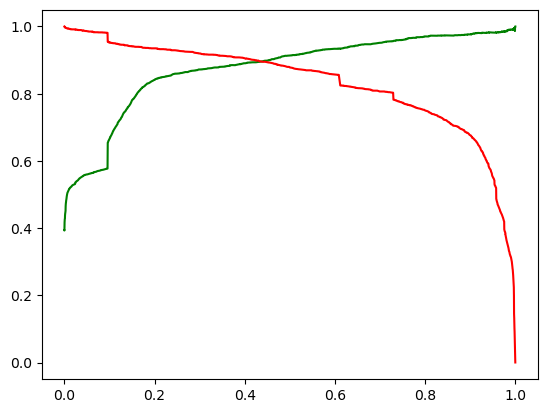

In [134]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Make prediction on test data

In [135]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))

In [136]:
y_test_pred[:10]

3271    0.122742
1490    0.972263
7936    0.108378
4216    0.999138
3830    0.124026
1800    0.754154
6507    0.006507
4821    0.000580
4223    0.996977
4714    0.096839
dtype: float64

In [137]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [138]:
# Let's see the head

y_pred_1.head()

0
3271  0.122742
1490  0.972263
7936  0.108378
4216  0.999138
3830  0.124026

In [139]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [140]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [141]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [142]:
# Check 'y_pred_final'

y_pred_final.head()

Converted         0
0          0  0.122742
1          1  0.972263
2          0  0.108378
3          1  0.999138
4          0  0.124026

In [144]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [145]:
# Make predictions on the test set using 0.44 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)

In [146]:
# Check y_pred_final

y_pred_final.head()

Converted  Conversion_Prob  final_predicted
0          0         0.122742                0
1          1         0.972263                1
2          0         0.108378                0
3          1         0.999138                1
4          0         0.124026                0

In [147]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)


0.9085567388909291

In [148]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1613,  121],
       [ 128,  861]], dtype=int64)

In [149]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [150]:
# Calculate Precision

TP/(TP+FP)

0.8767820773930753

In [151]:
# Calculate Recall

TP/(TP+FN)

0.8705763397371082

### Summary for Lead Scoring Case study –
1.	Aim was to find out which all variables are directly impacting the conversion rate, so after performing data cleaning on original data we selected only few variables –
i.	Many leads are generated from landing page submission, which was through organic search, direct traffic or through google. 
ii.	Very less time is spent on website, may be due to its UI/UX, as conversion is higher if person spends most of its time o website.
iii.	Email opening is the activity which is performed the most when online. Also, very apt segment is spending time on websites – mostly un employed
2.	Now after, EDA we divided data to train and testing set – mapped correlation shows high number of features were collinear with each other (multi-collinearity issue).
3.	We used RFE , VIF and P-value check for elimination/selection of appropriate features-
i.	Tags_Will revert after reading the email
ii.	Lead Quality_Not Sure
iii.	Total Time Spent on Website
iv.	Lead Origin_Lead Add Form
v.	Tags_Ringing
vi.	Last Notable Activity_SMS Sent
vii.	Lead Source_Welingak Website
viii.	Tags_Closed by Horizzon
ix.	Tags_Busy
x.	Do Not Email
xi.	Tags_switched off
xii.	Tags_Lost to EINS
xiii.	Lead Quality_Worst
4.	Then we predicted, and evaluated the model on predicted variables by checking stats metrics by performing confusion metrics - 
i.	After selecting apt features through VIF/P-value check
a.	Accuracy – 92%
b.	Sensitivity – 87.7%
c.	Specificity – 94.8%
ii.	Are under ROC curve is 96% , which shows good model fit, to evaluate cut-off point we will check metrics – 
a.	Accuracy – 92%
b.	Sensitivity – 90.5%
c.	Specificity – 93.5%
5.	We also made prediction on the test set using the same variable used after VIF/p-value check – 
i.	Fitting the learnt model on test data below are metrics numbers –
a.	Accuracy – 90.7%
b.	Sensitivity – 88.1%
c.	Specificity – 92.27%
ii.	We also check precision and recall on the data – 
a.	Accuracy – 90.85%
b.	Sensitivity – 87.67%
c.	Specificity – 87.05%
So, looking at the metrics we can say that all the variables are mostly correctly predicted whether they are converted or not. Also the lead score mapped were highest for the above mentioned feature variables which indicates that the above variables are very helpful in determining whether the Lead will get ‘Converted’ or ‘Not converted’.
